# Playground: KYUL_v1

Testing ground for project development.

In [1]:
from config.settings import ProjectRoot, LocalDataPath, OutPath, PlotsPath
from config.plot_config import set_plot_style; set_plot_style()

from models.waveform import Waveform

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

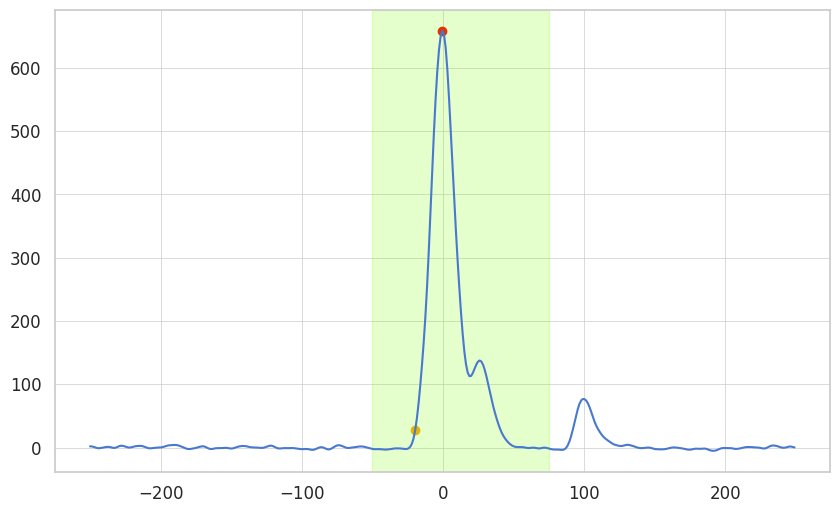

In [33]:
run = 2

# Event parameters
PEAK_THRESH = 125
INGRESS_THRESH = 25

# Plotting window
PLOT_CUT = 150

if run < 17:
    # Expected signal around zero
    T_MIN = -50
    T_MAX = 75
else:
    # Expected signal after zero
    T_MIN = 1
    T_MAX = 85

ROI = [T_MIN, T_MAX]

csvpath = os.path.join(LocalDataPath, f"Run{run}/scope-1-seg1-ch1.csv")
wf = Waveform(csvpath)
wf.read_from_csv()
wf.rescale(xfactor=1e9,yfactor=-1e3)
wf.calculate_baseline()
wf.zero_baseline()
wf.smooth()

x,y = wf.get_data(zipped=False)

a = np.argmin(np.abs(x - ROI[0]))
b = np.argmin(np.abs(x - ROI[1]))

ROI = [a,b]

wf.detect_main_peak(ROI, 125)
wf.identify_ingress(25, ROI);

try:
    peak_idx, peak_val            = wf.get_main_peak()
    plt.scatter(x[peak_idx], y[peak_idx], color = 'red')
except:
    pass

try:
    ingress_idx, ingress_time_val = wf.get_ingress()
    plt.scatter(x[ingress_idx], y[ingress_idx], color = 'orange')
except:
    pass

plt.axvspan(T_MIN, T_MAX, color = 'lawngreen', alpha = 0.2)

#plt.xlim(x[PLOT_CUT], x[-PLOT_CUT])

plt.plot(x,y);

In [29]:
a

np.int64(167)